In [2]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

In [3]:
!git clone https://github.com/jamsuham75/deeplearning.git
dataframe = read_csv('/content/deeplearning/corona_daily.csv', usecols=[3], engine='python', skipfooter=3)
print(dataframe)
dataset = dataframe.values
dataset = dataset.astype('float32')

Cloning into 'deeplearning'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
     Confirmed
0           24
1           24
2           27
3           27
4           28
..         ...
107      11190
108      11206
109      11225
110      11265
111      11344

[112 rows x 1 columns]


In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
Dataset = scaler.fit_transform(dataset)
train_data, test_data = train_test_split(Dataset, test_size=0.2, shuffle=False)
print(len(train_data), len(test_data))

89 23


In [5]:
def create_dataset(dataset, look_back):
  x_data = []
  y_data = []
  for i in range(len(dataset)-look_back):
    data = dataset[i:(i+look_back),0]
    x_data.append(data)
    y_data.append(dataset[i+look_back, 0])
  return np.array(x_data), np.array(y_data)


In [6]:
look_back = 3
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(86, 3) (86,)
(20, 3) (20,)


In [7]:
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(X_train.shape)
print(X_test.shape)

(86, 1, 3)
(20, 1, 3)


In [8]:
model = Sequential()
model.add(SimpleRNN(3, input_shape = (1, look_back)))
model.add(Dense(1, activation="linear"))

In [9]:
model.compile(loss = 'mse', optimizer='sgd')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 21        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train, y_train, epochs = 100, batch_size=1, verbose=1)

Epoch 1/100
86/86 [==============================] - 1s 2ms/step - loss: 0.2007
Epoch 2/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 3/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 4/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 5/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 6/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 7/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 8/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 9/100
86/86 [==============================] - 0s 1ms/step - loss: 8.8300e-04
Epoch 10/100
86/86 [==============================] - 0s 1ms/step - loss: 8.0035e-04
Epoch 11/100
86/86 [==============================] - 0s 2ms/step - loss: 8.0358e-04
Epoch 12/100
86/86 [==============================] - 0s 1ms/step - loss: 7.8105e-04
Epoch 13/100
86/86 [=

In [13]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
TrainPredict = scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform([y_train])
TestPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([y_test])
print(trainPredict)
print(TrainPredict)
# print(len(TestPredict))
# print(len(testPredict))

[[0.01213841]
 [0.01207586]
 [0.0123439 ]
 [0.01232305]
 [0.01239243]
 [0.01239243]
 [0.01239243]
 [0.01245238]
 [0.01249149]
 [0.01259995]
 [0.01384789]
 [0.01668058]
 [0.0229733 ]
 [0.03838386]
 [0.05073132]
 [0.07721723]
 [0.0928336 ]
 [0.12333623]
 [0.15805352]
 [0.2011815 ]
 [0.27194923]
 [0.32536688]
 [0.39264065]
 [0.45240685]
 [0.494847  ]
 [0.5416682 ]
 [0.5877538 ]
 [0.62355256]
 [0.6581368 ]
 [0.6872225 ]
 [0.70701826]
 [0.7277055 ]
 [0.7335737 ]
 [0.7482357 ]
 [0.7559736 ]
 [0.7622347 ]
 [0.7689502 ]
 [0.7744746 ]
 [0.7799791 ]
 [0.7880527 ]
 [0.7926017 ]
 [0.8038192 ]
 [0.80850625]
 [0.8158865 ]
 [0.82203245]
 [0.82712054]
 [0.8323623 ]
 [0.8381345 ]
 [0.8462632 ]
 [0.8511133 ]
 [0.85834587]
 [0.86579645]
 [0.87020266]
 [0.87673545]
 [0.88228166]
 [0.887571  ]
 [0.8921113 ]
 [0.8961227 ]
 [0.9001918 ]
 [0.90297973]
 [0.9052057 ]
 [0.90756094]
 [0.9096322 ]
 [0.9112009 ]
 [0.9126389 ]
 [0.9143443 ]
 [0.91571796]
 [0.917019  ]
 [0.9184066 ]
 [0.919464  ]
 [0.92028975]
 [0.92

In [19]:
trainScore = math.sqrt(mean_squared_error(Y_train[0], TrainPredict[:,0]))
print('Train Score : %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], TestPredict[:,0]))
print('Test Score : %.2f RMSE' % (testScore))

Train Score : 256.35 RMSE
Test Score : 413.81 RMSE


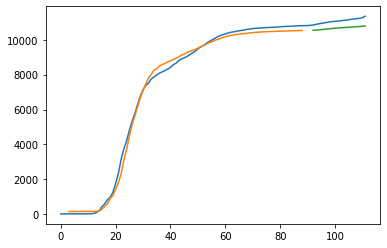

In [21]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back : len(TrainPredict) + look_back, : ] = TrainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(TrainPredict) + (look_back) * 2 : len(dataset), : ] = TestPredict
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()